# 주성분 분석

### 차원과 차원 축소

차원(dimension)

- 특성 : 데이터가 가지 속성

- 차원(dimension) : 머신러닝에서는 특성을 차원이라 부름

- 다차원 배열에서의 차원 : 배열의 축 개수

- 2차원 배열에서의 차원 : 행과 열

- 1차원 배열(백터)에서의 차원 : 원소의 개수

차원 축소(dimensionality reduction)
- 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습의 모델의 성능을 향상시킬 수 있는 방법

- 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원도 가능

주성분 분석(principal component analysis); PCA
- 분산(데이터가 널리 퍼져있는 정도)이 큰 방향을 찾는 것

- 분산이 큰 방향 -> 데이터를 잘 표현하는 어떤 벡터

- 이 벡터를 주성분(principal component)라고 부름

- 이 주성분 벡터는 원본 데이터에 있는 어떤 방향
- 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음
- 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다

- 사이킷런의 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰줌; 수동으로 데이터를 원점에 맞출 필요 x

- 주성분은 원본 차원과 같고, 주성분을 바꾼 데이터는 차원이 줄어든다

- 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타냄

1. 첫 번째 주성분을 찾기

2. 찾은 벡터에 수직이고 분산이 가장 큰 다음 방향 찾기(두 번째 주성분)

- 주성분은 원본 특성의 개수만큼 찾을 수 있음

- 주성분은 원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있음
- 일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성의 개수만큼 찾을 수 있다고 함

### PCA 클래스

In [11]:
# 과일 사진 데이터 다운로드, 넘파이 배열로 적재
!curl -L https://bit.ly/fruits_300_data -o fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   116  100   116    0     0    535      0 --:--:-- --:--:-- --:--:--   542
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2929k  100 2929k    0     0  3076k      0 --:--:-- --:--:-- --:--:-- 35.7M


- 사이킷런은 sklearn.decomposition모듈 아래 PCA 클래스로 주성분 분석 알고리즘 제공

- PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 함
- 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공 x

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [17]:
# 배열의 크기 확인
print(pca.components_.shape)  # (50, 10000) 출력

(50, 10000)


- n_components=50으로 저장 -> pca.components_ 배열의 첫 번째 차원이 50
- - 50개의 주성분을 찾음

- 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000

In [23]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
    n = len(arr) # 샘플 개수
    # 한 줄에 10개씩 이미지 그림
    # 샘플 개수를 10으로 나누어 전체 행 개수 계산
    rows = int(np.ceil(n / 10))
    # 행이 1개이면 열의 개수 = 샘플의 개수, 그렇지 않으면 10개
    cols = n if rows == 1 else 10 # <2
    fig, axes = plt.subplots(rows, cols, 
                             figsize=(cols * ratio, rows * ratio), squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n: # n개까지만 그림
                axes[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
            axes[i, j].axis('off')
    plt.show()

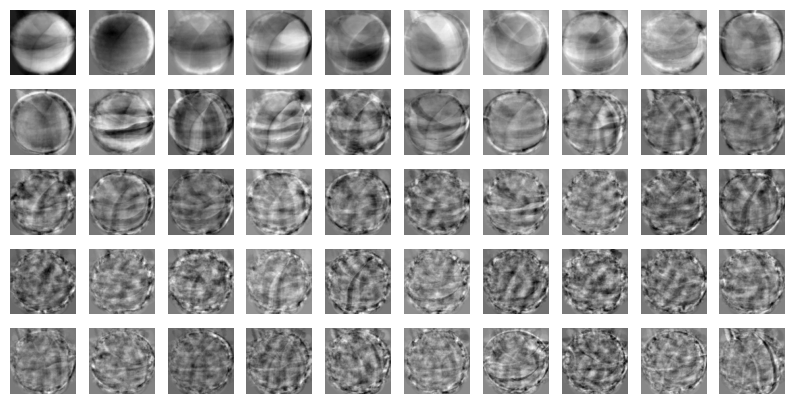

In [24]:
# 주성분을 100*100 크기의 이미지처럼 출력
draw_fruits(pca.components_.reshape(-1, 100, 100))


- 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

- 데이터셋에 있는 어떤 특징을 잡아낸 것

In [25]:
# 차원 축소
print(fruits_2d.shape)  # (300, 10000)

(300, 10000)


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)  # (300, 50) 출력

(300, 50)


### 원본 데이터 재구성

- 10,000개의 특성 -> 50개
- 어느 정도 손실이 발생함

- 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있음

In [27]:
# 특성 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)  # (300, 10000) 출력

(300, 10000)


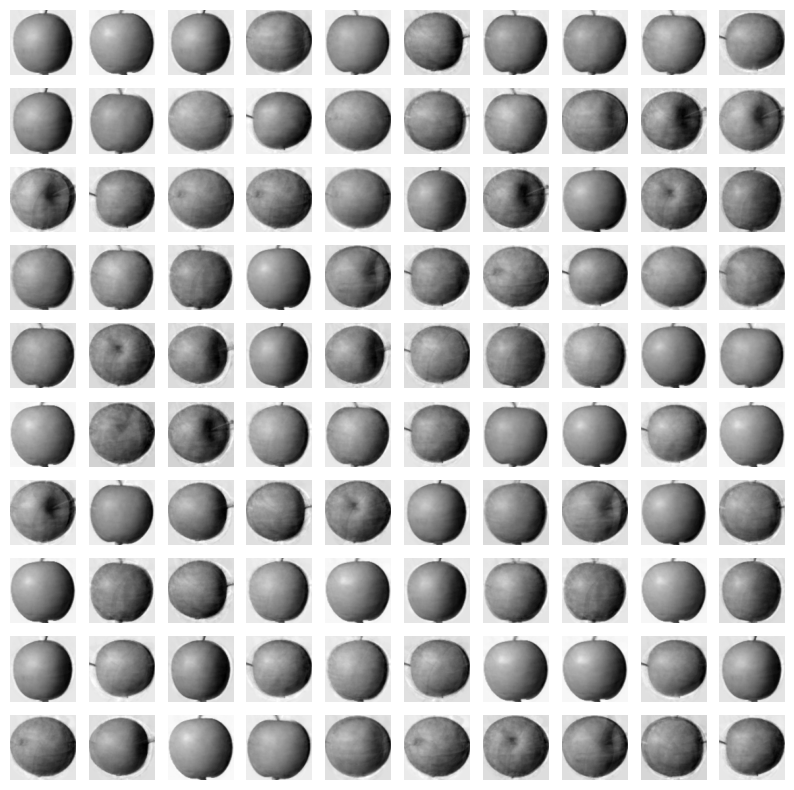

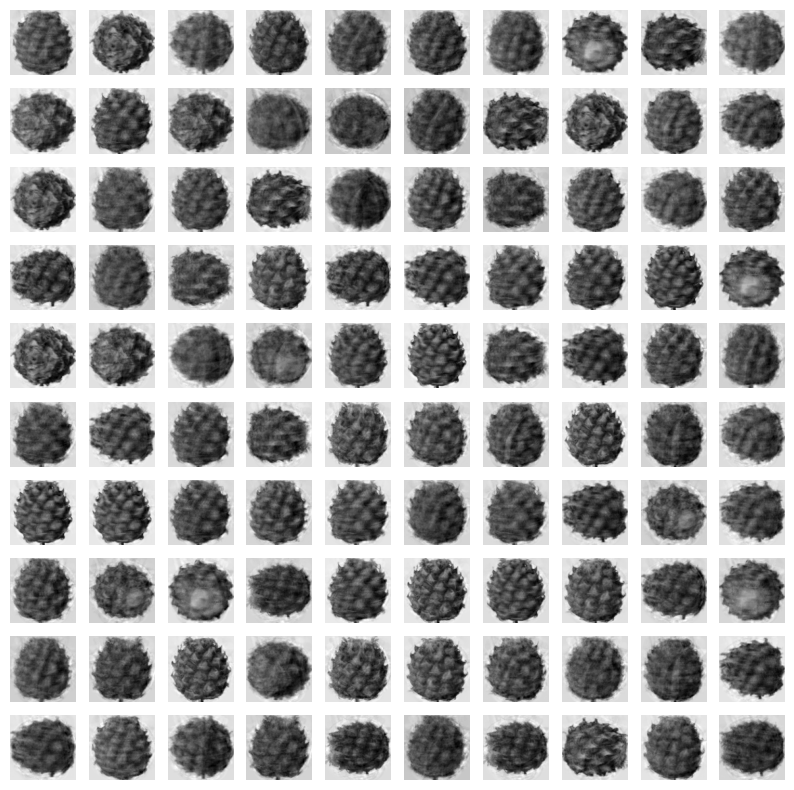

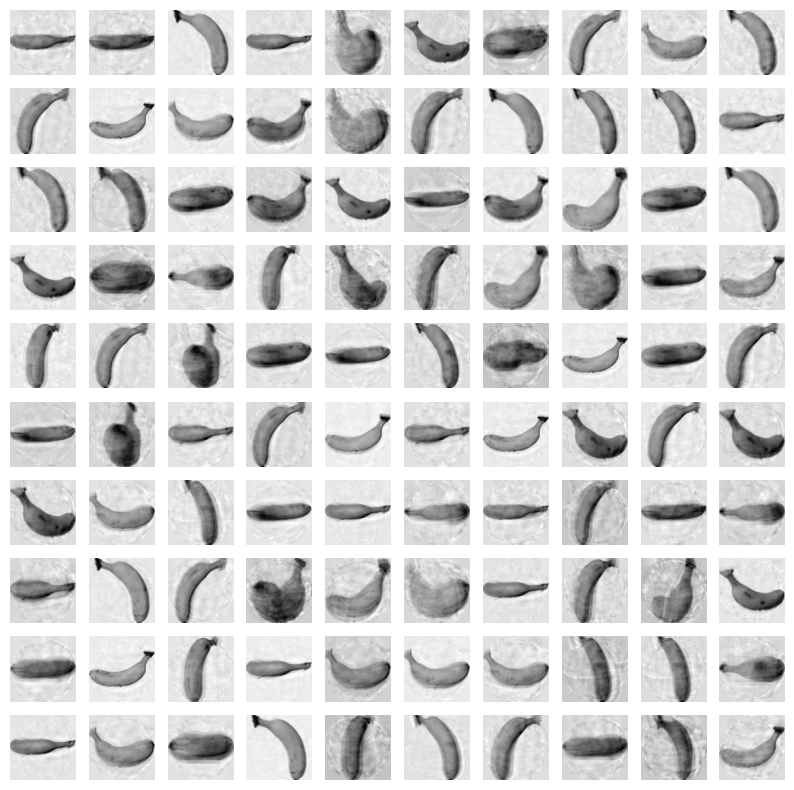

In [28]:
# 데이터를 100*100 크기로 바꾸어 100개씩 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

### 설명된 분산

설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

- PCA 클래스의 explained_variance_ratio에 각 주성분의 설명된 분산 비율이 기록
- 첫 번째 주성분의 설명된 분산이 가장 큼

In [31]:
# 총분산 비율 
print(np.sum(pca.explained_variance_ratio_)) 

0.9215912656342053


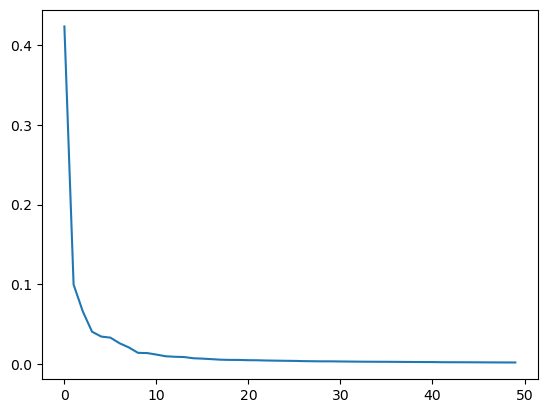

In [32]:
# 분산 비율 그래프
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현하고 있음

- 그 다음부터는 각 주성분이 설명하고 있는 분산을 비교적 작음

### 다른 알고리즘과 함께 사용

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 확인

In [34]:
# 로지스틱 회귀 모델 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
# 타깃값 생성
# 사과 0, 파인애플 1, 바나나2
target = np.array([0]*100 + [1]*100 + [2]*100)

In [36]:
# 교차검증 
from sklearn.model_selection import cross_validate
# 원본 데이터로 교차검증
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))  # 0.9966666666666667
print(np.mean(scores['fit_time']))   # 0.005773502691896258

0.9966666666666667
0.4023542881011963


In [37]:
# PCA로 축소한 데이터로 교차검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))  # 0.9733333333333334
print(np.mean(scores['fit_time']))   # 0.001965999603271484

1.0
0.005389165878295898


- 정확도 100

In [38]:
# 설명된 분산의 50%에 달하는 주성분 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [39]:
print(pca.n_components_)

2


In [41]:
# 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) 

(300, 2)


In [43]:
# 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) 
print(np.mean(scores['fit_time']))  

0.99
0.007769584655761719


/Users/youju/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/youju/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [46]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True)) 

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/Users/youju/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


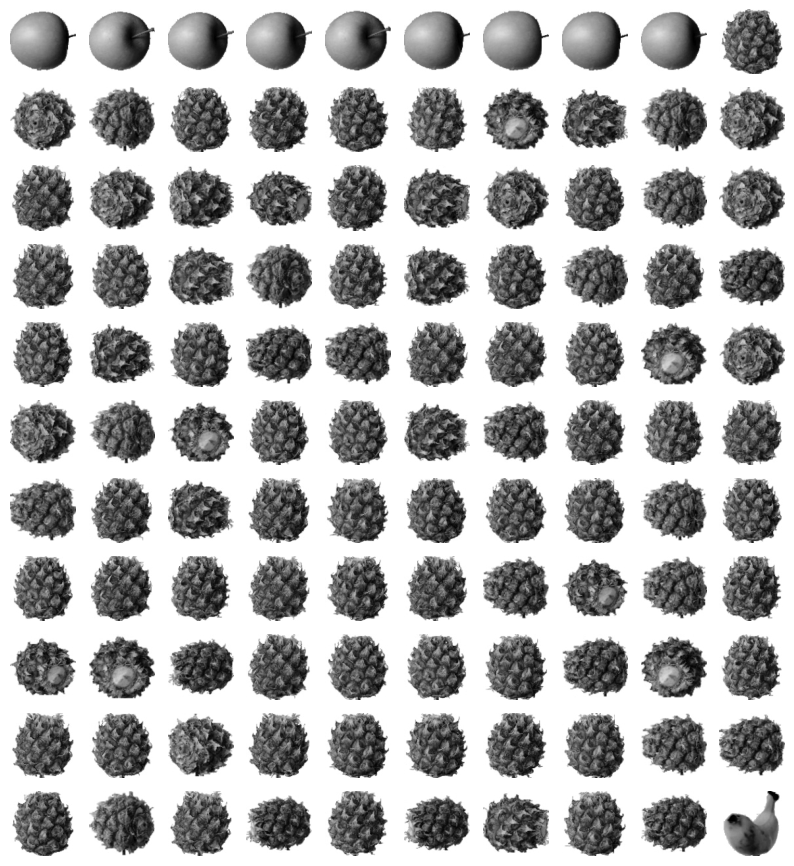

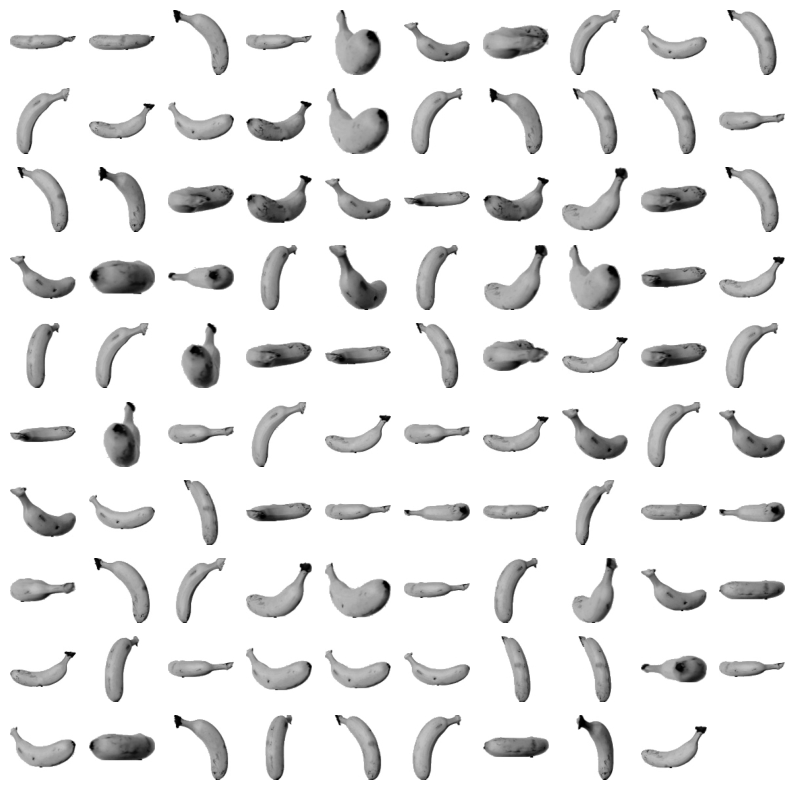

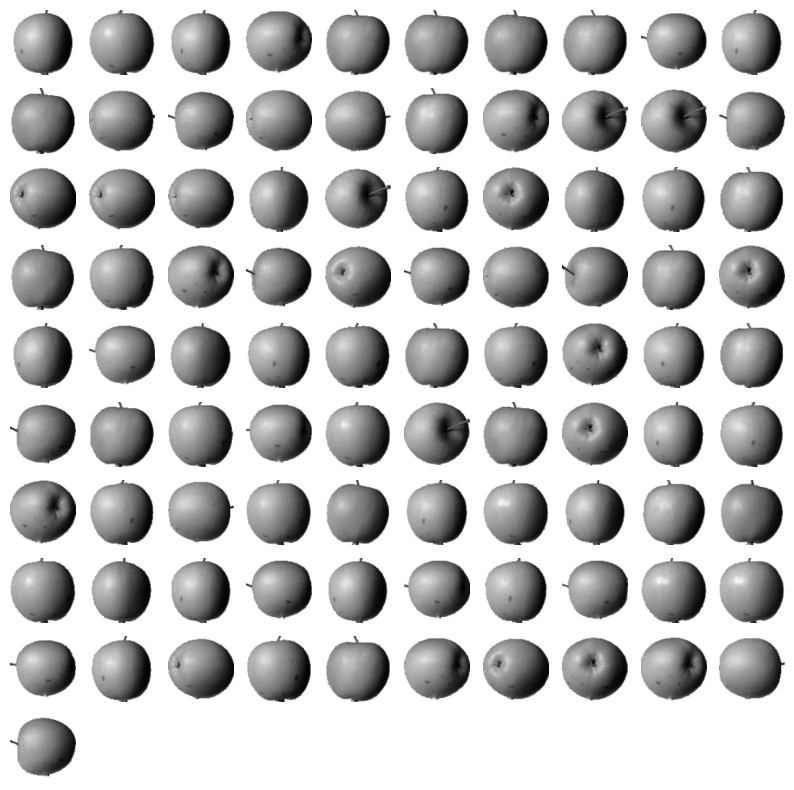

In [47]:
# 과일 이미지 출력
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print()

- 훈련 데이터의 차원 축소 장점 -> 시각화

- 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

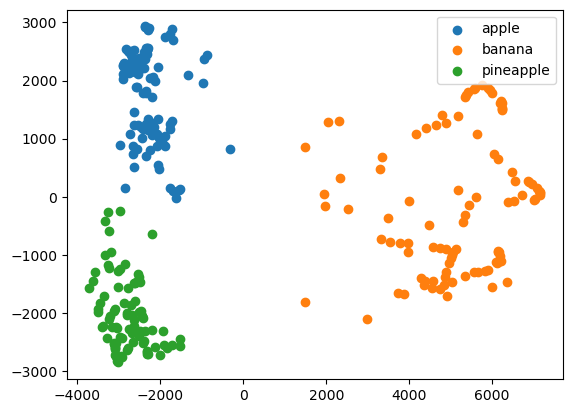

In [48]:
# 2차원으로 표현
# 클러스터별로 나누어 산점도 그리기
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()